![header](../figures/logos_partenaires._cmems_se.jpg)

# Intercomparison of sea surface gridded product

<div style="text-align: right"><i> 2023-04-27 INTERCOMPARISON_DEMO </i></div>

***
**Authors:**  CLS & Datlas <br>
**Copyright:** 2023 CLS & Datlas <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h1><center> Intercomparison of sea surface height maps</center></h1>
    
</div>

In [1]:
import sys
sys.path.append('..')
from src.mod_plot import *
from src.mod_compare import *

<div class="alert alert-info" role="alert">

<h2>1. Reference maps: DUACS sea surface products</h2>

</div>

In [2]:
output_dir = '../results' 
lon_min = -6
lon_max = 36
lat_min = 30
lat_max = 46 

In [3]:
data_path = '../data/maps/'
methods = ['DUACS-allsat','MIOST','4DVarNet']

ds_maps_list = list()

for method in methods: 
    print(method)
    files = data_path+method+'/*nc'
    ds_maps = xr.open_mfdataset(files,concat_dim='time', combine='nested')
    ds_maps = regional_zoom(ds_maps, [lon_min,lon_max], [lat_min,lat_max], namelon='longitude', namelat='latitude', change_lon=False)
    
    ds_maps_list.append(ds_maps)



DUACS-allsat
MIOST
4DVarNet


In [ ]:
movie_intercomp(ds_maps_list, methods, name_var='sla', dir_output='../results/',
                    region='4DMedSea', vmin=-0.6, vmax=0.6, framerate=24, colsize = 14)

In [37]:
        
def movie_intercomp(ds_maps_list, methods=['DUACS'], name_var='uv', dir_output='../results/',
                    region='Agulhas', framerate=24, colsize = 10,vmin=-0.8,vmax=0.8,cmap='RdBu_r'):
     
    import cartopy.crs as ccrs

    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


    if vmin == 0: 
        extend = 'max'
    else:
        extend = 'both'

    nmet = np.size(methods)

    method = 'intercomp'
    ncol = 2
    gridspec_kw={'width_ratios': [1, 1.25]}
    
    
    for tt in range(ds_maps_list[0]['time'].size):


            if nmet == 1:
                ncol=1
                gridspec_kw=None
                method = methods[0]

            fig, axs = plt.subplots(int(np.ceil(nmet/2)),ncol,figsize=(20,int(np.ceil(nmet/2))*4+2), gridspec_kw=gridspec_kw, subplot_kw={'projection': ccrs.PlateCarree()})
             

            date = str(ds_maps_list[0]['time'][tt].values)[:13]
            plt.suptitle(date)

            for i_met in range(nmet):

                if nmet==1:
                    ax0 = axs
                elif nmet>2:
                    ax0 = axs[int(i_met/2),i_met%2]
                else:
                    ax0 = axs[i_met]

                ids = ds_maps_list[i_met].isel(time=tt)
                if i_met%2 == 0 and nmet!=1:
                    ids[name_var].plot(ax=ax0,cmap=cmap,vmin=vmin,vmax=vmax,add_colorbar=False)
                else:
                    ids[name_var].plot(ax=ax0,cmap=cmap,vmin=vmin,vmax=vmax,add_colorbar=True, extend=extend) 
                ax0.set_title(methods[i_met])
                
                ax0.coastlines(resolution='10m', lw=0.5, zorder=13)
                ax0.add_feature(cfeature.LAND, color='w', zorder=12)
                gl = ax0.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                                      linewidth=0.1, color='black', alpha=0.5, linestyle='--')
                gl.top_labels = False
                gl.right_labels = False
                gl.left_labels = True 

            if nmet%2 !=0 and nmet!=1:
                i_met += 1
                axs[int(i_met/2),i_met%2].axis('off')
                
            # optional add grid lines
            #p1.axes.gridlines(color='black', alpha=0., linestyle='--')
            # draw parallels/meridiens and write labels
            # adjust labels to taste   
             

            fig.savefig(f'{dir_output}/frame_{method}_{region}_{name_var}_{str(tt).zfill(5)}.png',dpi=100)

            plt.close(fig)

    moviename = f'movie_{method}_{region}_{name_var}.mp4'

    import os
    import subprocess
    from IPython.display import Video

    # Create movie
    sourcefolder = dir_output
    frame_pattern = f'frame_{method}_{region}_{name_var}_*.png'
    ffmpeg_options="-c:v libx264 -preset veryslow -crf 15 -pix_fmt yuv420p -loglevel quiet"

    command = 'ffmpeg -f image2 -r %i -pattern_type glob -i %s -y %s -r %i %s' % (
            framerate,
            os.path.join(sourcefolder, frame_pattern),
            ffmpeg_options,
            framerate,
            os.path.join(dir_output, moviename),
        )
    #print(command)

    _ = subprocess.run(command.split(' '),stdout=subprocess.DEVNULL)


    os.system(f'rm {os.path.join(sourcefolder, frame_pattern)}')

    return Video(os.path.join(dir_output, moviename),embed=True)

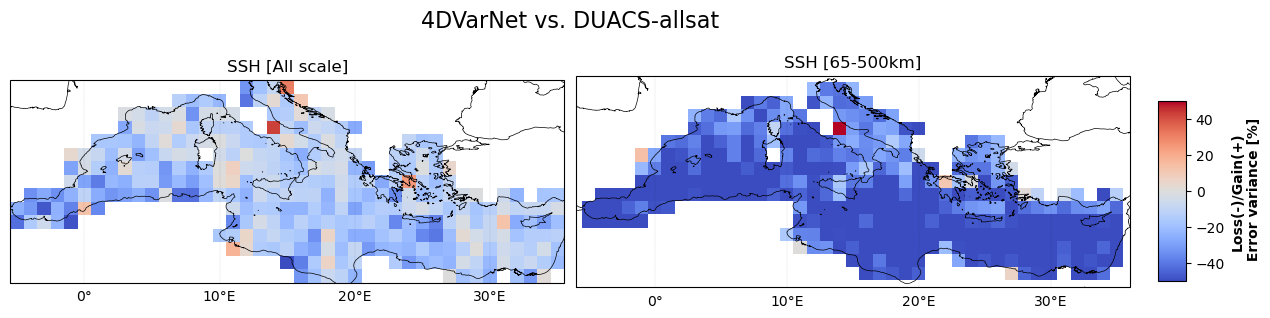

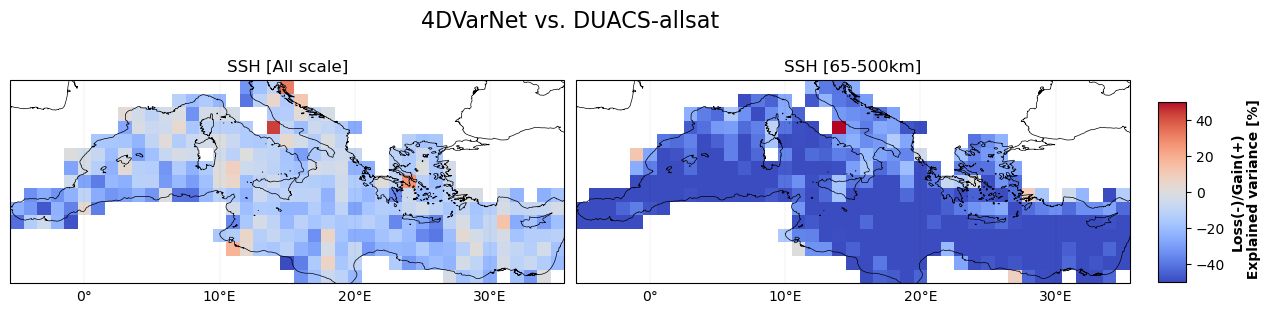

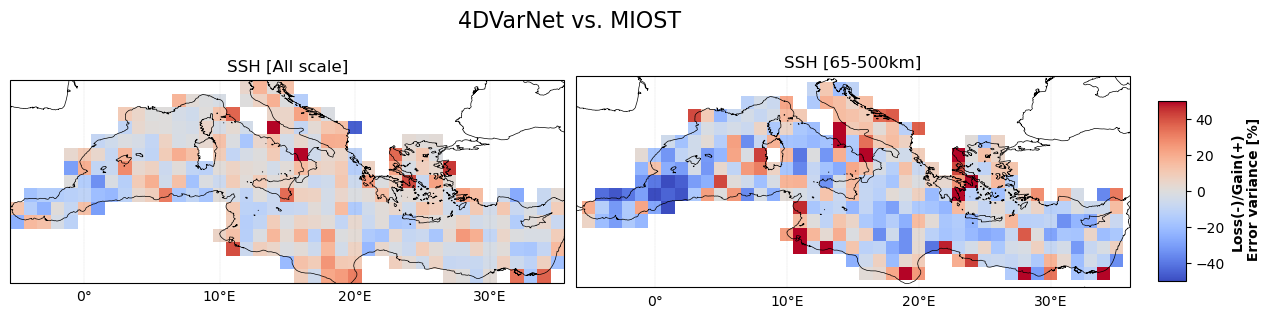

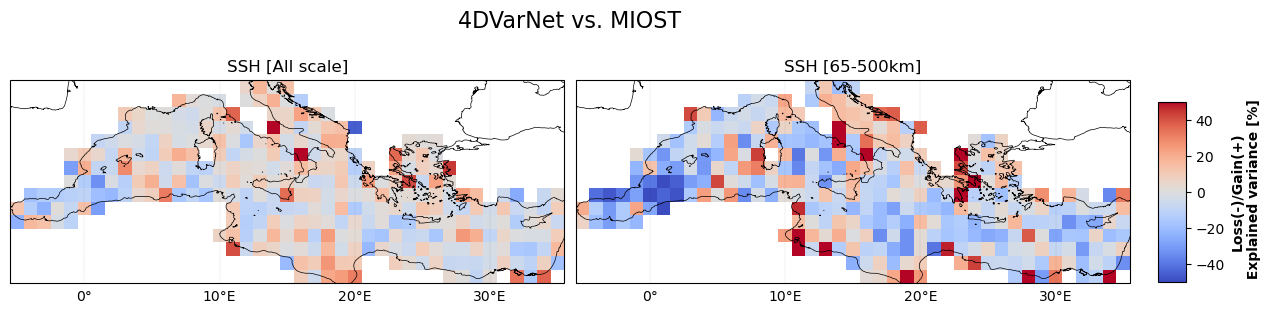

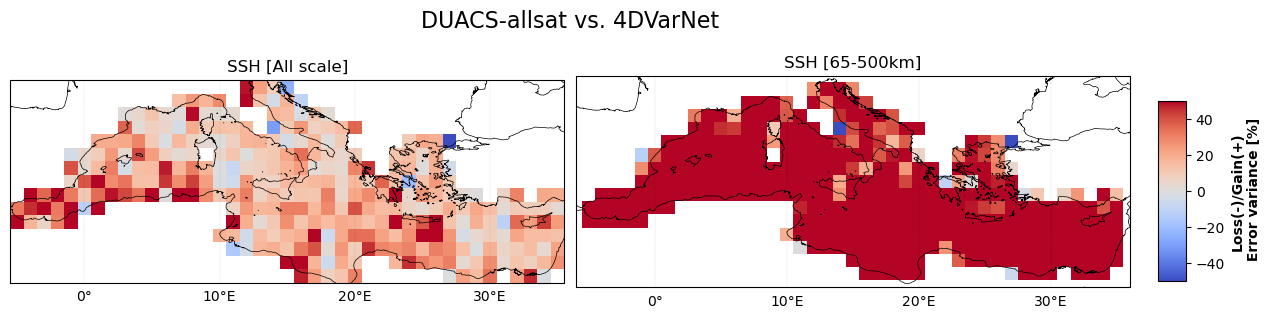

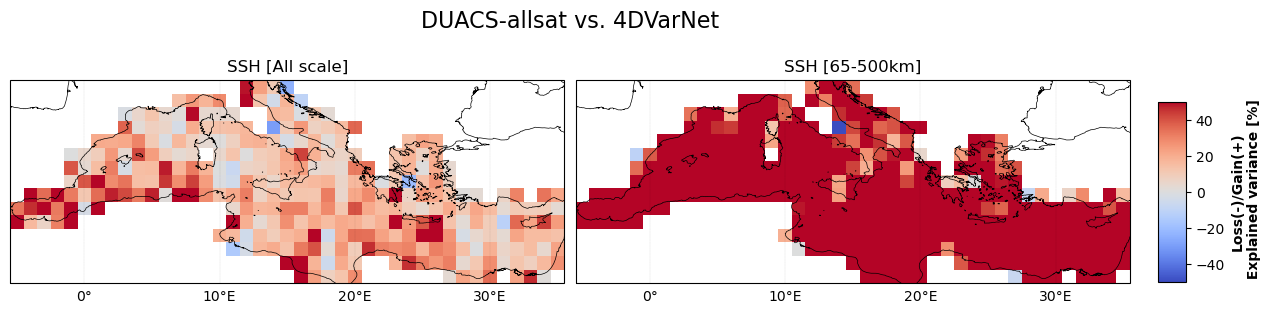

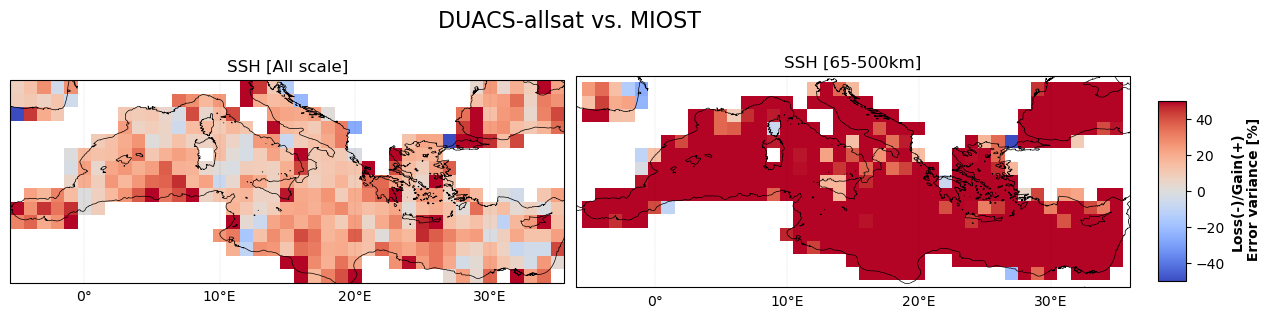

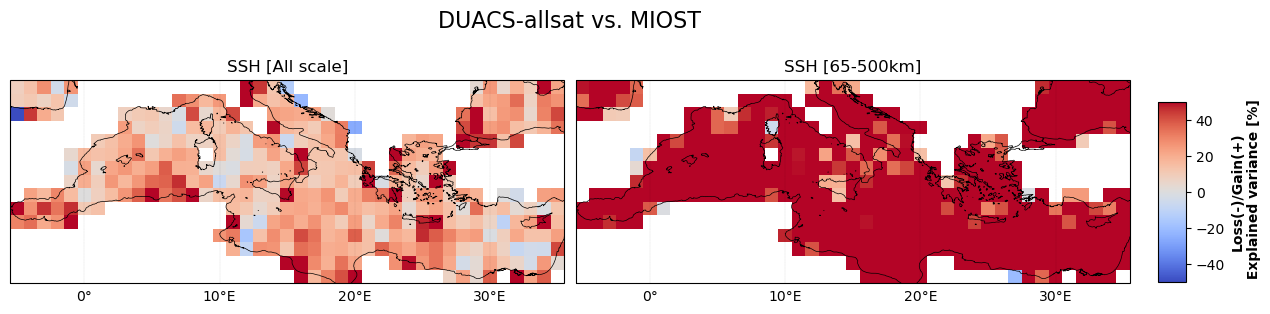

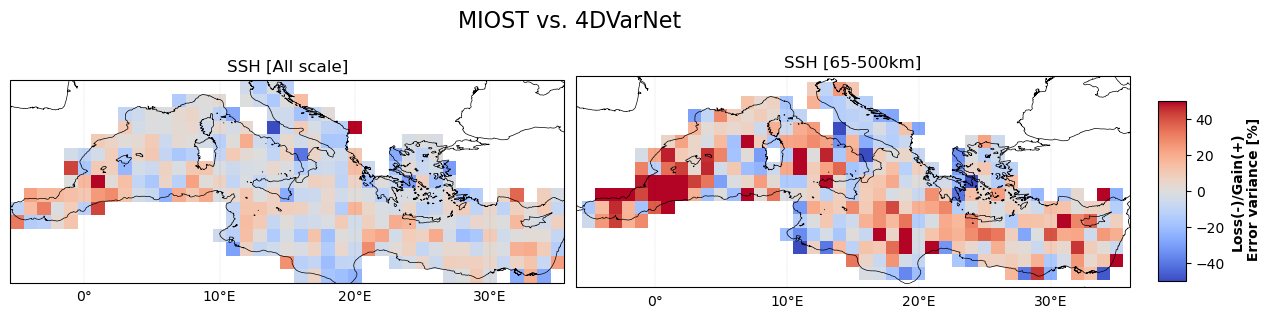

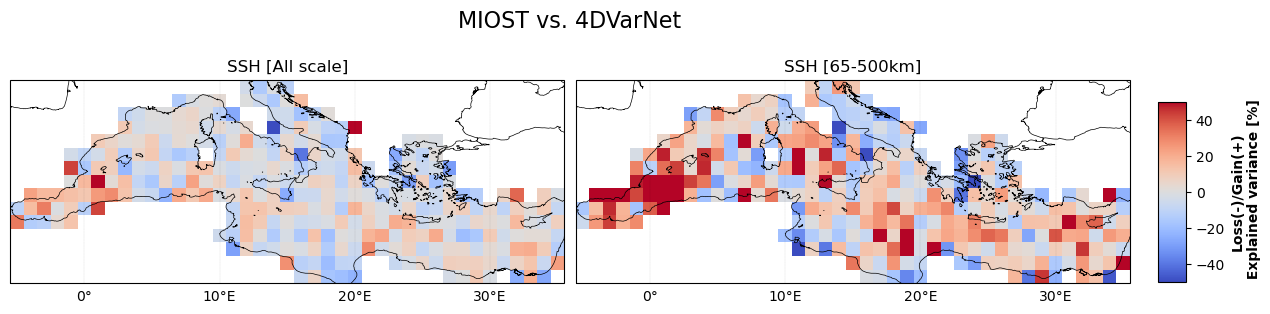

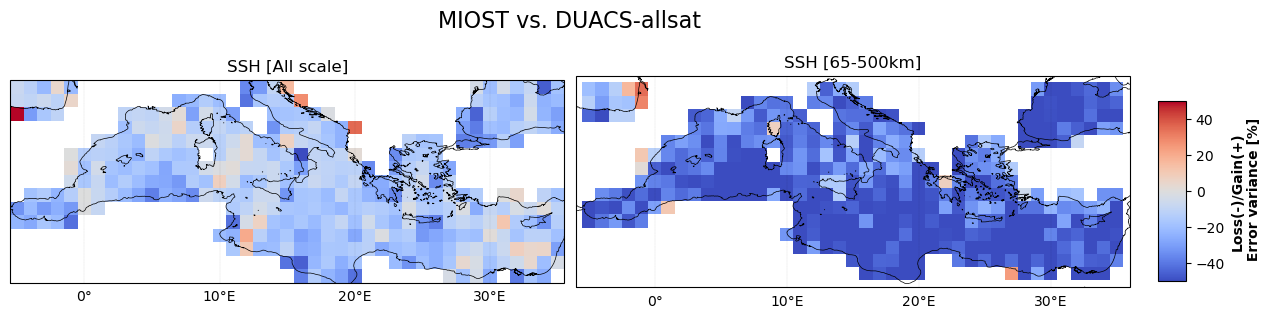

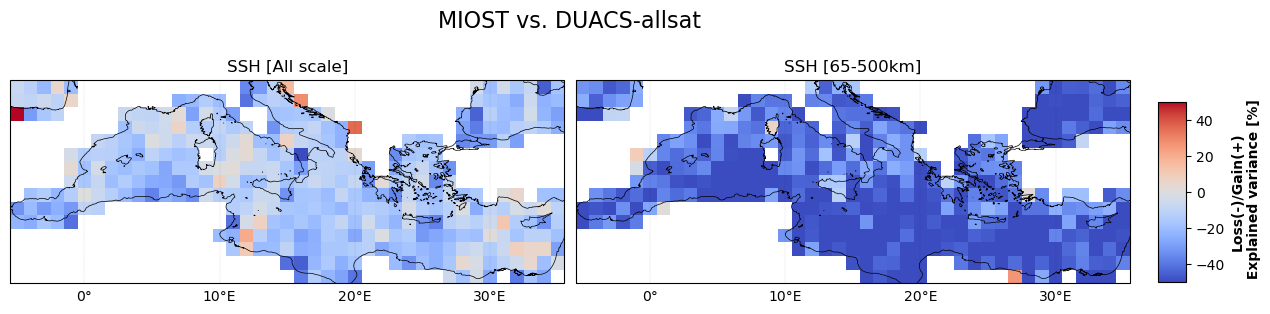

In [3]:
# Plot gridded stats
compare_stat_score_map_png(output_dir='../results/',boxlon = [-6, 36],boxlat = [30, 46], var_type='sla')

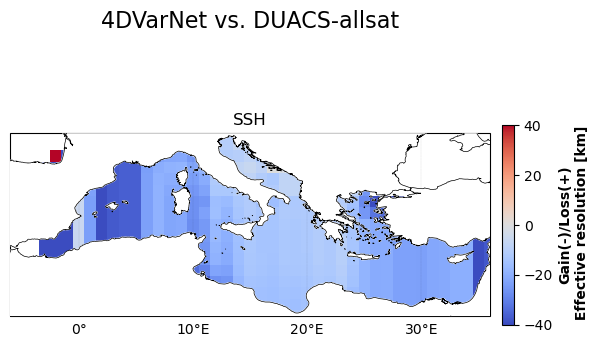

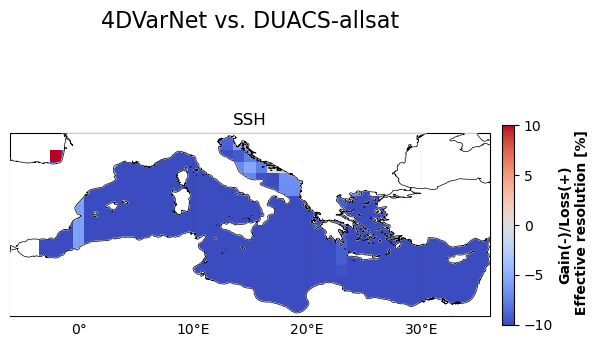

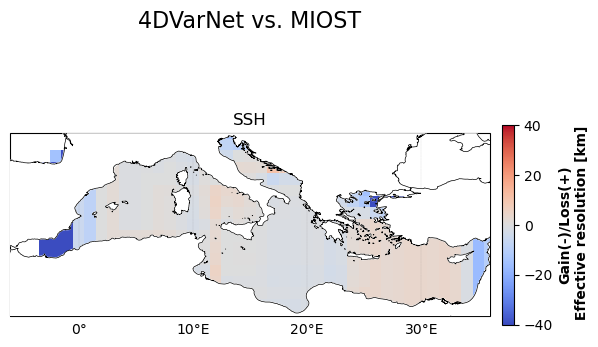

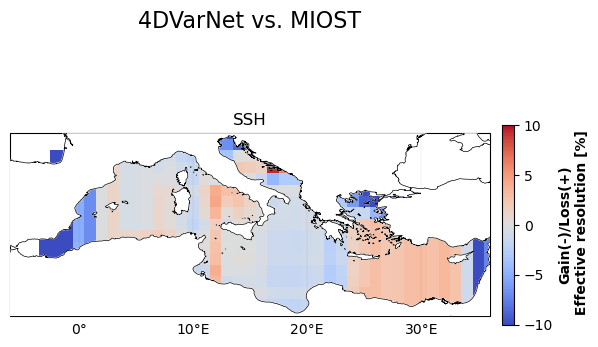

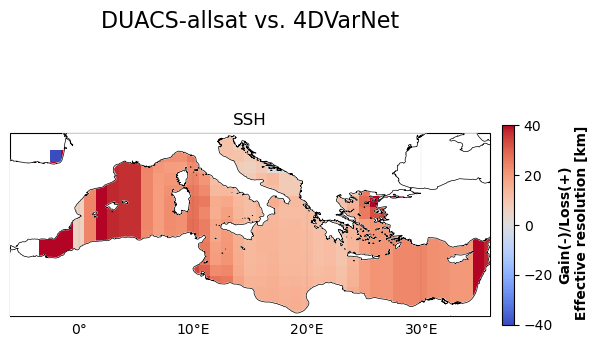

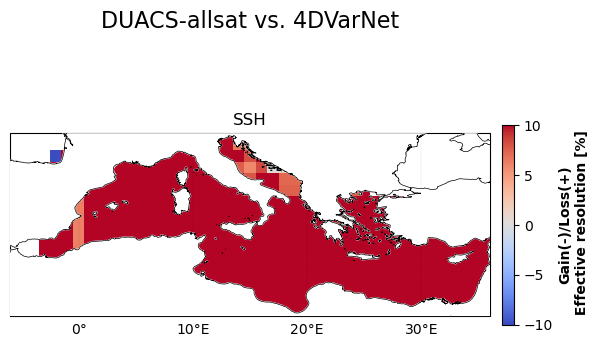

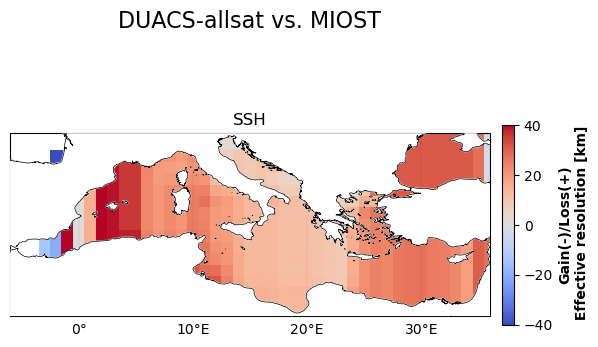

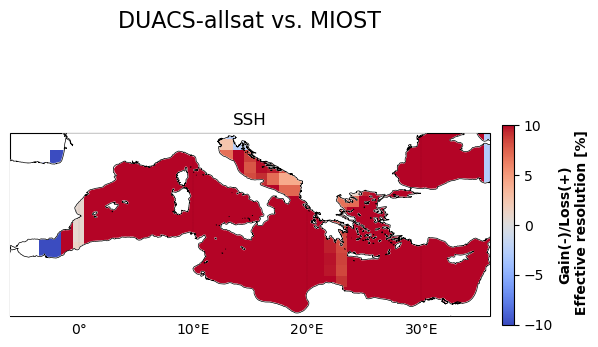

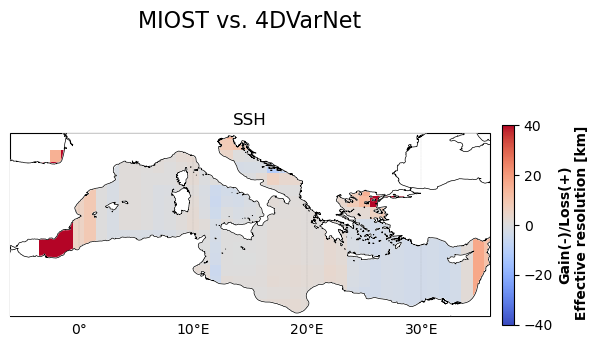

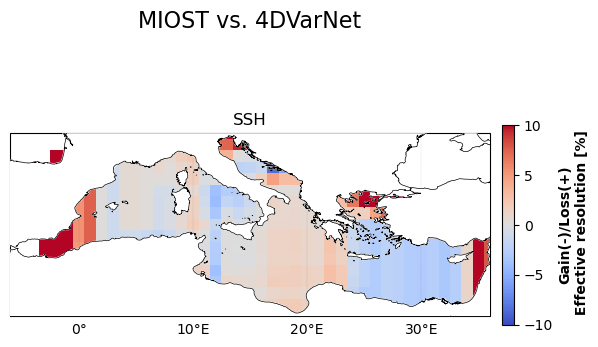

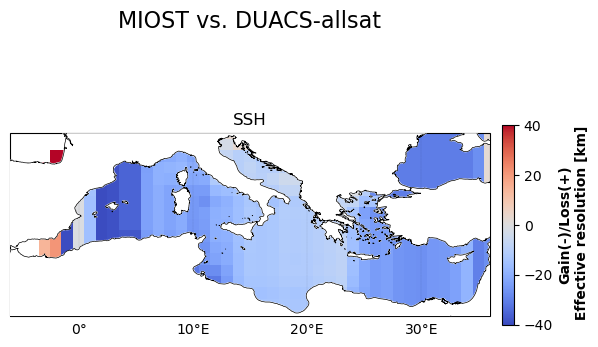

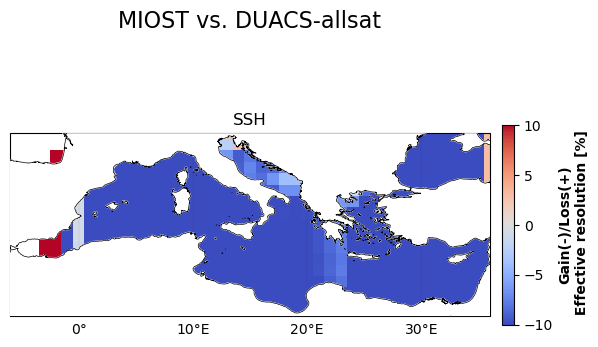

In [24]:
#compare_psd_score(miost_geos_psd_filename, duacs_geos_psd_filename)
compare_psd_score_png(output_dir='../results/',boxlon = [-6, 36],boxlat = [30, 46], var_type='sla')

## Sea Surface Currents

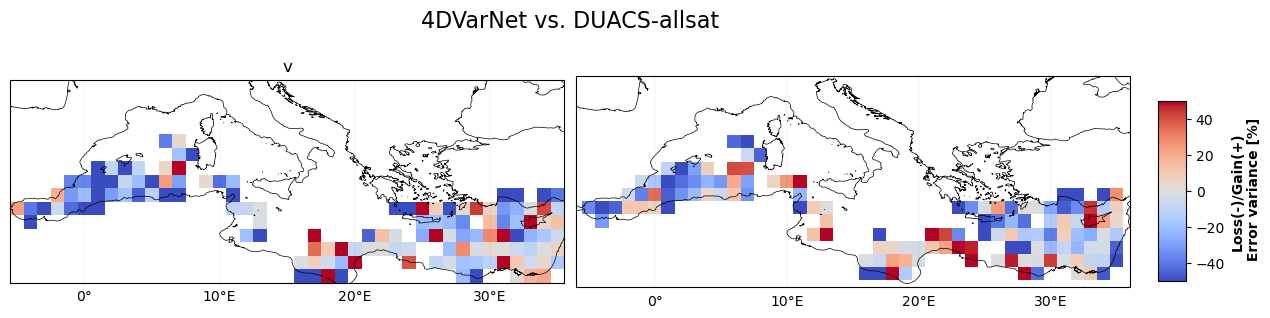

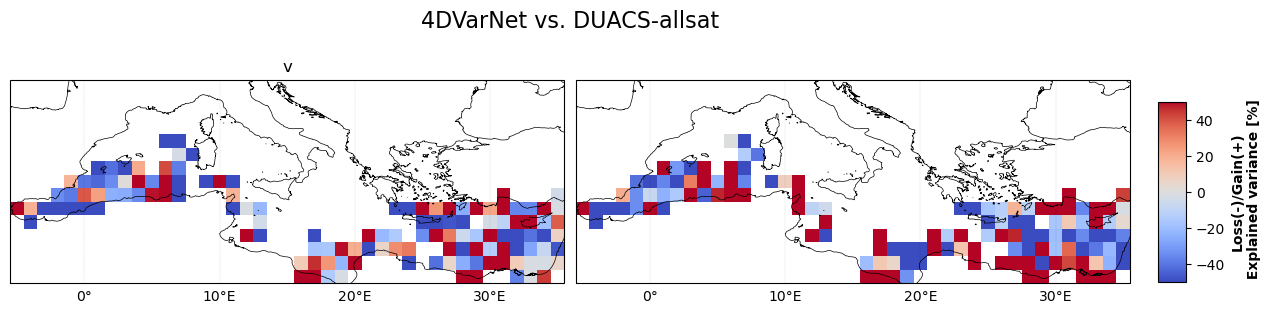

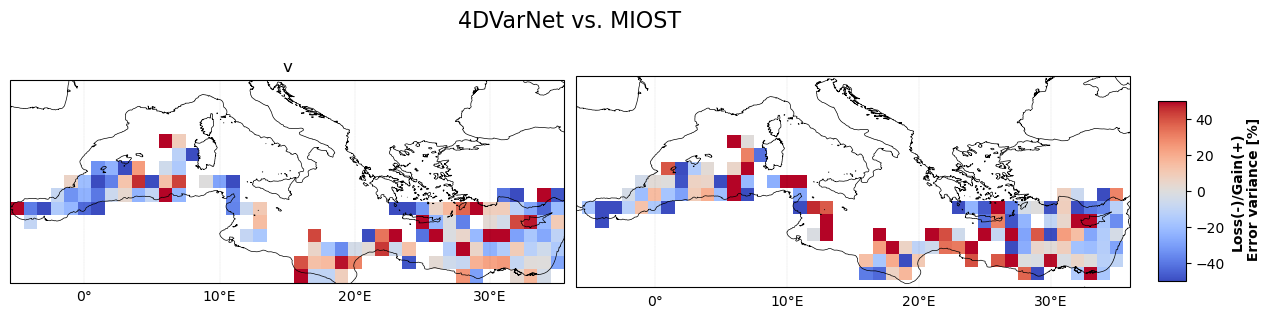

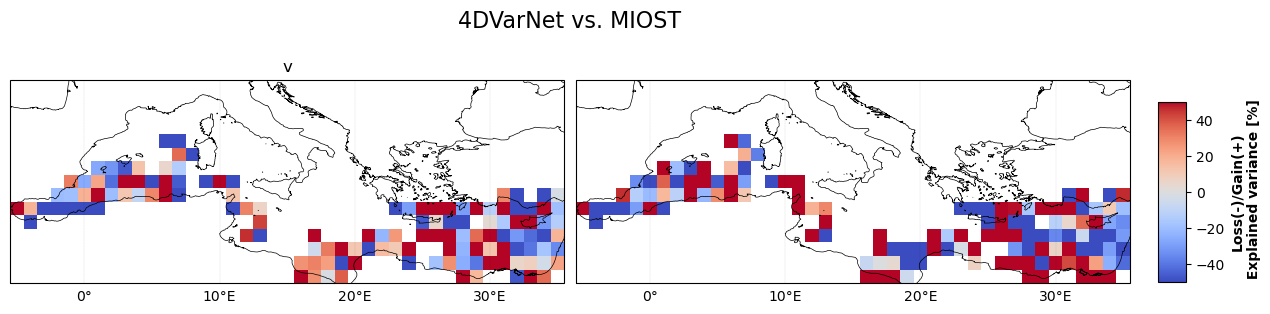

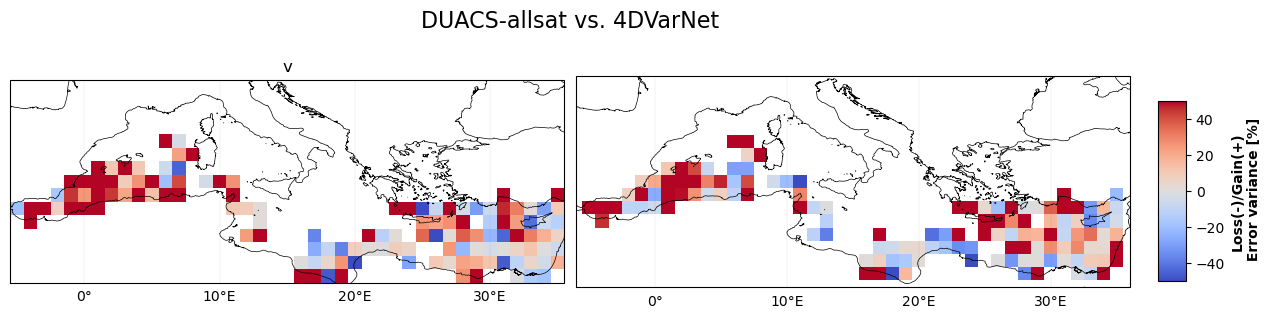

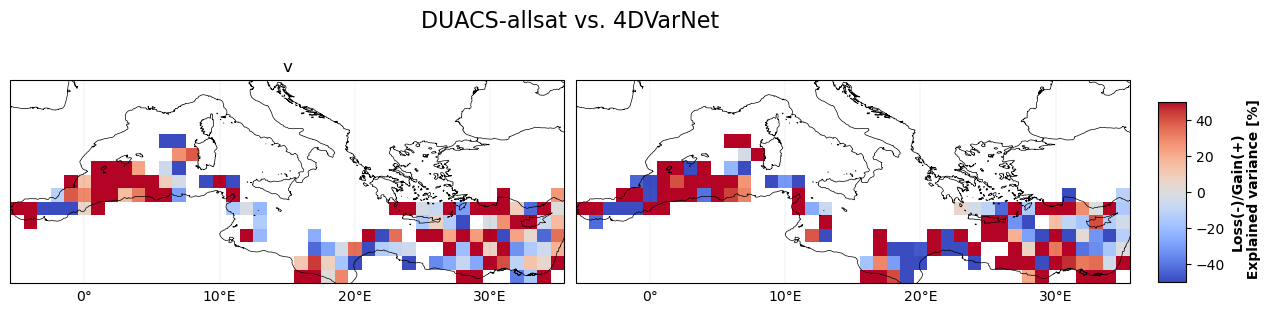

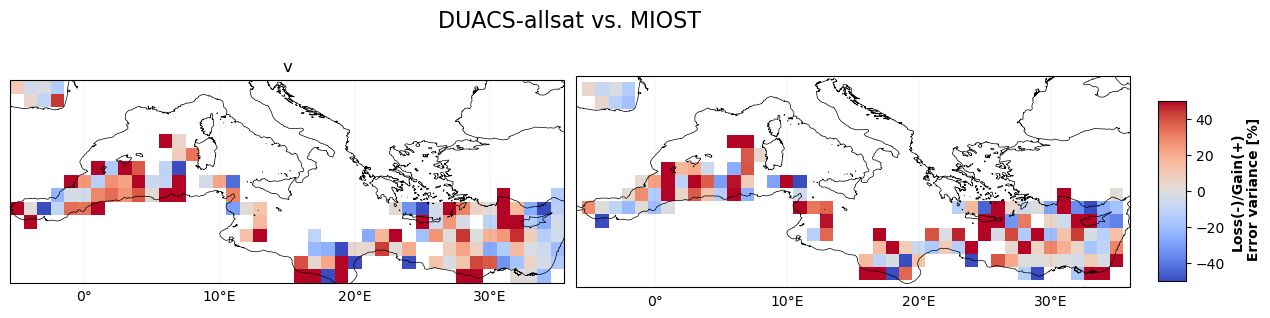

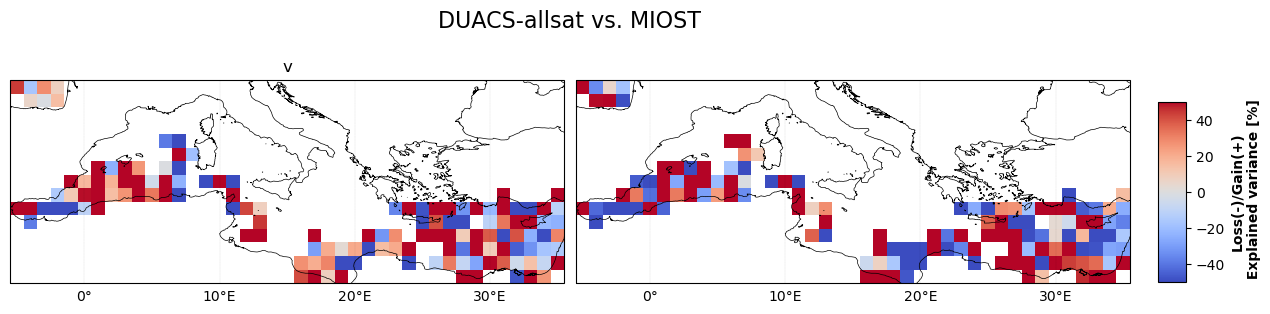

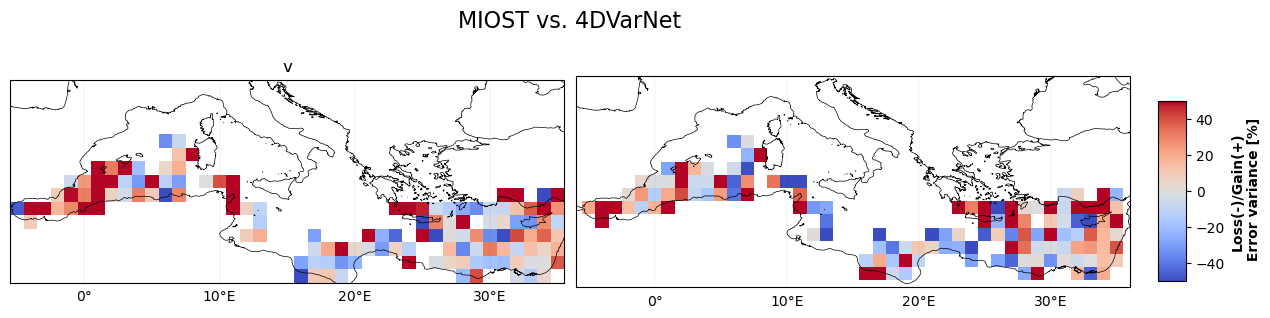

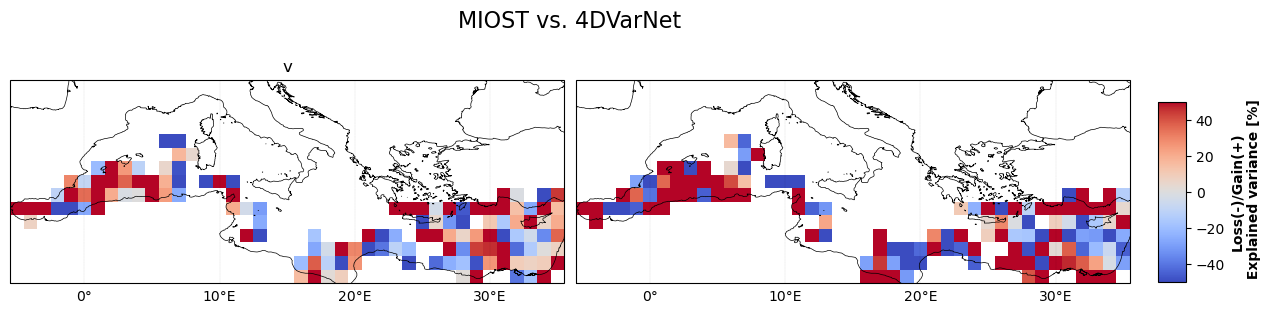

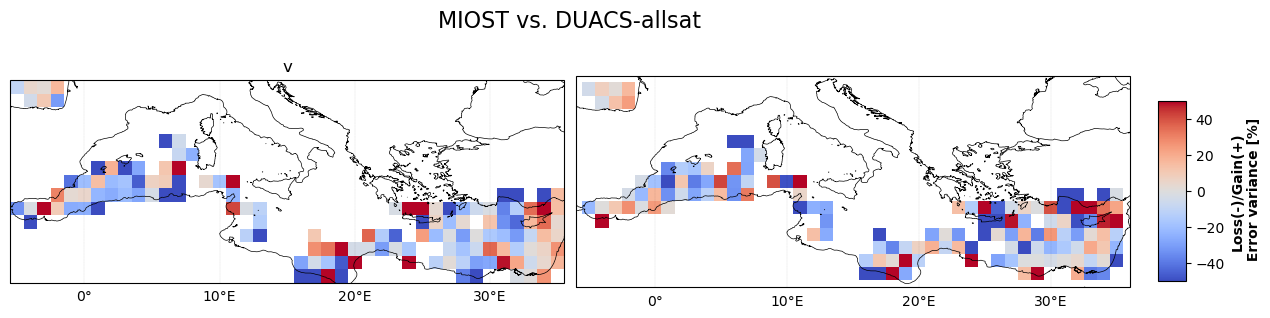

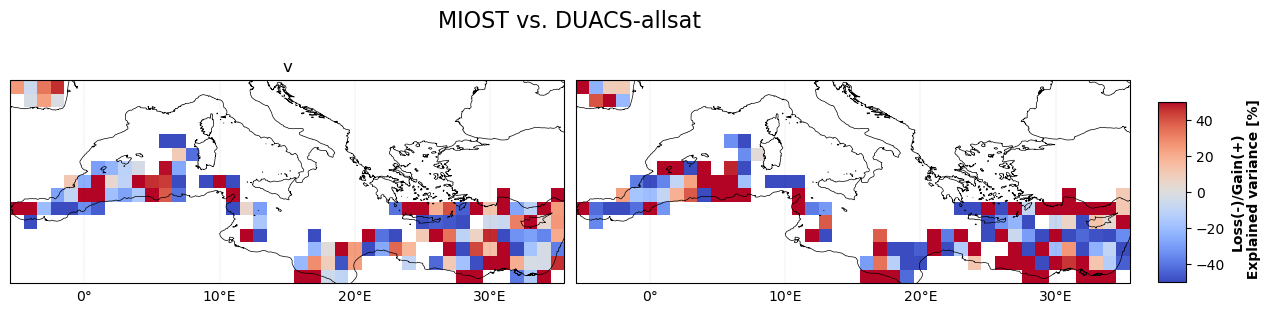

In [13]:
# Plot gridded stats
compare_stat_score_map_png(output_dir='../results/',boxlon = [-6, 36],boxlat = [30, 46], var_type='uv')

## Plot spatially averaged deviation as a function of horizons

In [4]:
plot_meantraj_deviation(dir_out)

NameError: name 'plot_meantraj_deviation' is not defined